In [1]:
#!pip install -U aeon
#!pip install aeon[all_extras]
import warnings
import pandas as pd
from matplotlib import pyplot as plt
from aeon.visualisation import plot_series
from all_functions import *
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb 
from sklearn.model_selection import GridSearchCV
from aeon.transformations.detrend import STLTransformer
import ast
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error, make_scorer
import os
from sklearn.linear_model import Ridge, RidgeCV
from datetime import datetime
from distutils.util import strtobool

warnings.filterwarnings("ignore")
%matplotlib inline
def convert_to_list(series_str):
    return eval(series_str)


/home/anp/anaconda3/lib/python3.11/site-packages/aeon/base/__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(


In [3]:
df, frequency, forecast_horizon, contain_missing_values, contain_equal_length = convert_tsf_to_dataframe(
f'/home/anp/Documents/m4/timeseries/electricity_weekly_dataset.tsf',
replace_missing_vals_with="NaN",
value_column_name="series_value",
)

transform = "normal"
representation = "DWT"
wavelet = "bior2.2"
level = 2
window = 8
horizon = 8
series = df.iloc[2]['series_value'].tolist()

train, test = train_test_stats(pd.Series(series), horizon)

train_tf = transform_regressors(train, transform)

data = rolling_window_image(pd.concat([train_tf, pd.Series([0] * horizon, index=test.index)]), window, representation, wavelet, level) 
data = data.dropna()
X_train, X_test, y_train, _ = train_test_split(data, horizon)
rg = RidgeCV(alphas=np.logspace(-3, 3, 10))
rg.fit(X_train, y_train)
predictions = recursive_step(X_test, train, rg, horizon, window, transform, representation, wavelet, level)
preds_real = pd.Series(predictions, index=test.index)
preds_real

148    1324.0
149    1324.0
150    1324.0
151    1324.0
152    1324.0
153    1324.0
154    1324.0
155    1324.0
dtype: float64

In [5]:
df_ridge = pd.read_csv('../m4/experiments/quarterly/quarterly.csv', sep=";")
df_ridge = df_ridge.iloc[:240000]
df_rf = pd.read_csv('../m4/experiments2/quarterly/quarterly.csv', sep=";")
df_rf = df_rf.iloc[:5250]
print(np.nanmean(df_ridge["rmse"].tolist()))
print(np.nanmean(df_rf["rmse"].tolist()))

FileNotFoundError: [Errno 2] No such file or directory: '../m4/experiments/quarterly/quarterly.csv'

In [ ]:
# transformations = ["normal", "deseasonal", "log"]
# models = ["CWT_rf"]
# # models = [
# #            "knn_noresid",
# #            "rf_noresid",
# #            "svr_noresid"
# #            ]
# noResid = False
# test_date = '2023-03_2024-02'
# results_file = f'./combination/all/{test_date}'
# horizon = 12
# window = 12
# expected_sequence = [
#     '2023-03_2024-02',
#     '2022-03_2023-02',
#     '2021-03_2022-02',
#     '2020-03_2021-02',
#     '2019-03_2020-02',
#     '2018-03_2019-02',
#     '2017-03_2018-02',
#     '2016-03_2017-02',
#     '2015-03_2016-02',
#     '2014-03_2015-02',
#     '2013-03_2014-02',
#     '2012-03_2013-02',
#     '2011-03_2012-02',
#     '2010-03_2011-02',
#     '2009-03_2010-02',
#     '2008-03_2009-02',
#     '2007-03_2008-02',
#     '2006-03_2007-02',
#     '2005-03_2006-02',
#     '2004-03_2005-02',
#     '2003-03_2004-02',
#     '2002-03_2003-02',
#     '2001-03_2002-02',
#     '2000-03_2001-02',
#     '1999-03_2000-02',
#     '1998-03_1999-02',
#     '1997-03_1998-02',
#     '1996-03_1997-02',
#     '1995-03_1996-02',
#     '1994-03_1995-02',
#     '1993-03_1994-02'
# ]
# dirs = [
#     '../datasets/venda/mensal/uf/gasolinac/',
#     '../datasets/venda/mensal/uf/etanolhidratado/',
#     '../datasets/venda/mensal/uf/glp/',
#     # '../datasets/venda/mensal/uf/oleodiesel/',
#     # '../datasets/venda/mensal/uf/querosenedeaviacao/',
# ]
# colunas = ['DATA', 'UF', 'PRODUCT', 'MODEL', 'PARAMS', 'WINDOW', 'HORIZON', 'RMSE', 'MAPE', 'POCID', 'PBE', 'MASE',
#            'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12',
#            ]
# for directory in dirs:
#     for file in os.listdir(directory) :
#         if file.endswith('.csv'):
#             uf = file.split("_")[1].upper()
#             derivado = file.split("_")[2].split(".")[0]
#             full_path = os.path.join(directory, file)
#             series = read_series(full_path)
#             _, test = train_test_stats(series, horizon)

#             predictions = {}
#             preds_elastic = []
#             preds_barycenter = []
            
#             for model in models:
#                 for transform in transformations:
#                     df = pd.read_csv(f'./results/{model}/{derivado}/{transform}/transform_{uf}.csv', sep=";")
#                     present_sequences = set(df['test_range'])

#                     expected_set = set(expected_sequence)

#                     missing_sequences = expected_set - present_sequences
#                     if len(missing_sequences) > 0:
#                         print(f"Falta em {model}/{derivado}/{transform}/transform_{uf}.csv:")
#                         for seq in sorted(missing_sequences):
#                             print(seq)

In [ ]:
def read_tsf(file_path):
    with open(file_path, 'r', encoding='ISO-8859-1') as f:
        lines = f.readlines()

    metadata = []
    series = []

    for line in lines:
        if line.startswith('@') or line.startswith('#'):
            metadata.append(line.strip())
        else:
            series.append(line.strip())

    formatted_data = []

    # Processar cada linha de série
    for entry in series:
        dataset_name, start_date, series_values = entry.split(':', 2)
        start_date = start_date.strip()
        series_list = [float(value) for value in series_values.split(',')]
        
        # Adicionar aos dados formatados
        formatted_data.append({
            'dataset': dataset_name,
            'start_date': start_date,
            'series': series_list
        })
        
    series_data = pd.DataFrame(formatted_data)


    return metadata, series_data

In [ ]:
import numpy as np
import pandas as pd

# Função para calcular os valores de SMAPE
def calculate_smape(forecasts, test_set):
    smape = 2 * np.abs(forecasts - test_set) / (np.abs(forecasts) + np.abs(test_set))
    smape_per_series = np.nanmean(smape, axis=1)  # Média por série
    return smape_per_series

# Função para calcular os valores de mSMAPE
def calculate_msmape(forecasts, test_set):
    epsilon = 0.1
    comparator = np.full(test_set.shape, 0.5 + epsilon)
    sum_values = np.maximum(comparator, (np.abs(forecasts) + np.abs(test_set) + epsilon))
    smape = 2 * np.abs(forecasts - test_set) / sum_values
    msmape_per_series = np.nanmean(smape, axis=1)
    return msmape_per_series

# Função para calcular os valores de MASE
def calculate_mase(forecasts, test_set, training_set, seasonality):
    mase_per_series = []
    
    for k in range(forecasts.shape[0]):
        te = test_set[k, ~np.isnan(test_set[k, :])]
        tr = training_set[k][~np.isnan(training_set[k])]
        f = forecasts[k, ~np.isnan(forecasts[k, :])]
        
        # Cálculo de MASE
        mase = MASE(te, f, np.mean(np.abs(np.diff(tr, n=1, axis=0, prepend=tr[0]))))
        
        if np.isnan(mase):
            mase = MASE(te, f, np.mean(np.abs(np.diff(tr, n=1, axis=0, prepend=tr[0]))))
        
        mase_per_series.append(mase)

    return np.array(mase_per_series)

# Função para calcular os valores de MAE
def calculate_mae(forecasts, test_set):
    mae = np.abs(forecasts - test_set)
    mae_per_series = np.nanmean(mae, axis=1)
    return mae_per_series

# Função para calcular os valores de RMSE
def calculate_rmse(forecasts, test_set):
    squared_errors = (forecasts - test_set) ** 2
    rmse_per_series = np.sqrt(np.nanmean(squared_errors, axis=1))
    return rmse_per_series

# Função para fornecer um resumo das métricas de erro
def calculate_errors(forecasts, test_set, training_set, seasonality, output_file_name):
    smape_per_series = calculate_smape(forecasts, test_set)
    msmape_per_series = calculate_msmape(forecasts, test_set)
    mase_per_series = calculate_mase(forecasts, test_set, training_set, seasonality)
    mae_per_series = calculate_mae(forecasts, test_set)
    rmse_per_series = calculate_rmse(forecasts, test_set)

    metrics = {
        "Mean SMAPE": np.nanmean(smape_per_series),
        "Median SMAPE": np.nanmedian(smape_per_series),
        "Mean mSMAPE": np.nanmean(msmape_per_series),
        "Median mSMAPE": np.nanmedian(msmape_per_series),
        "Mean MASE": np.nanmean(mase_per_series),
        "Median MASE": np.nanmedian(mase_per_series),
        "Mean MAE": np.nanmean(mae_per_series),
        "Median MAE": np.nanmedian(mae_per_series),
        "Mean RMSE": np.nanmean(rmse_per_series),
        "Median RMSE": np.nanmedian(rmse_per_series),
    }

    for key, value in metrics.items():
        print(f"{key}: {value}")

    # Escrevendo as métricas em arquivos
    np.savetxt(f"{output_file_name}_smape.txt", smape_per_series, delimiter=",")
    np.savetxt(f"{output_file_name}_msmape.txt", msmape_per_series, delimiter=",")
    np.savetxt(f"{output_file_name}_mase.txt", mase_per_series, delimiter=",")
    np.savetxt(f"{output_file_name}_mae.txt", mae_per_series, delimiter=",")
    np.savetxt(f"{output_file_name}_rmse.txt", rmse_per_series, delimiter=",")
    
    with open(f"{output_file_name}.txt", "w") as f:
        for key, value in metrics.items():
            f.write(f"{key}: {value}\n")

# Função auxiliar para calcular MASE
def MASE(actual, forecast, training_mean):
    return np.mean(np.abs(actual - forecast)) / training_mean if training_mean != 0 else np.nan

def ensure_even(n):
    return n - (n % 2)

In [ ]:
window = 12
metadata, series_data = read_tsf('../m4/m4_yearly_dataset.tsf')

for meta in metadata:
    if '@horizon' in meta:
        horizon = int(meta[9:])
window = ensure_even(horizon)
series = series_data.loc[54]['series']
train, test = train_test_stats(pd.Series(series), horizon)
train_val, test_val = train_test_stats(train, horizon)
convs = generate_convolutions_2(window, 20)
train

0      128.78
1      132.75
2      141.02
3      153.50
4      164.34
5      176.40
6      183.09
7      201.19
8      221.09
9      237.96
10     251.73
11     272.28
12     295.23
13     313.41
14     337.83
15     360.32
16     391.13
17     425.03
18     470.01
19     518.94
20     577.56
21     655.30
22     720.51
23     781.73
24     869.42
25     977.59
26    1089.75
27    1202.90
28    1340.83
29    1497.09
30    1728.19
31    1973.56
32    2256.73
33    2562.33
dtype: float64

In [ ]:
# data = features_target_v2(pd.concat([train, pd.Series([0] * horizon, index=test.index)]), convs, window)

# train_tf = transform_regressors(train, "normal")
data = rolling_semnorm(pd.concat([train, pd.Series([0] * horizon, index=test.index)]), window)
                                        

In [ ]:
from sklearn.svm import SVR
X_train, X_test, y_train, _ = train_test_split(data, horizon)
rg = RidgeCV(alphas=np.logspace(-3, 3, 10))
# rg = RandomForestRegressor(n_estimators=200, random_state=42)
from sklearn.ensemble import GradientBoostingRegressor
# rg = GradientBoostingRegressor(loss='squared_error')
# rg = GradientBoostingRegressor(
#     n_estimators=1200,        # Número de árvores
#     learning_rate=0.05,      # Taxa de aprendizado
#     max_depth=5,             # Profundidade máxima das árvores
#     min_samples_split=3,     # Amostras mínimas para dividir um nó
#     min_samples_leaf=2,      # Amostras mínimas em cada folha
#     subsample=0.5,           # Proporção de dados usados para cada árvore
#     max_features=None,       
#     loss='squared_error'     
# )
rg.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]))

In [ ]:
renorm = pd.concat([train, pd.Series([0] * horizon, index=test.index)]).tolist()
#RIDGE
# predictions = recursive_rocket1_v2(X_test, rg, znorm(train[-window:]).tolist(), convs, horizon, window)
preds_real = recursive_multistep_forecasting(X_test, rg, horizon)
# preds = pd.Series(predictions, index=test.index)
# preds_real = reverse_regressors(train, preds, format="normal")
# mean = np.mean(train)
# std = np.std(train)
# preds_real = znorm_reverse(preds, mean, std)

preds_real

[2919.321477586238,
 3333.9279694160605,
 3810.621433000704,
 4356.511435583439,
 4980.889313743149,
 5699.048534990047]

In [ ]:
test

34    2840.07
35    3116.18
36    3472.21
37    3803.11
38    4164.57
39    4687.12
dtype: float64

In [ ]:
preds_real_array = np.array(preds_real)
preds_real_reshaped = preds_real_array.reshape(1, -1)
test_reshaped = test.values.reshape(1, -1)
rmse_result_ridge = calculate_rmse(preds_real_reshaped, test_reshaped)
rmse_result_ridge

array([600.67281772])

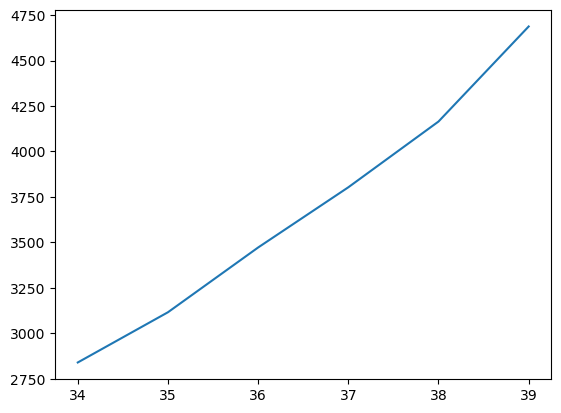

In [ ]:
plt.plot(test)
plt.show()

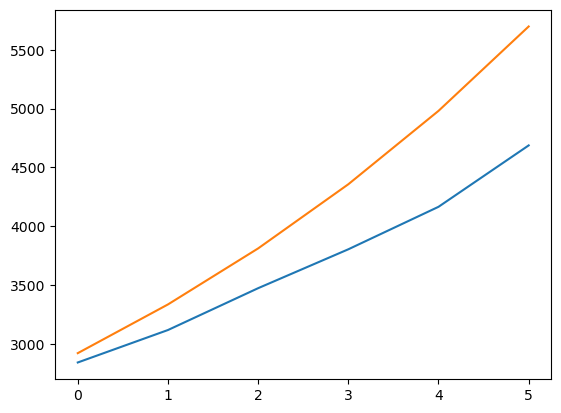

In [ ]:
# plt.plot(preds_real)
plt.plot(test.tolist())
plt.plot(preds_real)
# plt.plot(train.tolist())
plt.show()

In [ ]:
# horizon = 13
# representation = "DWT"
# level = 7
# wavelet = "bior2.2"
# transform = "normal"
# window = 14
# # window = 90

# # series = pd.read_csv('../m4/m4_monthly_dataset.tsf', sep='\t', encoding='ISO-8859-1')
# smapes_ridge = []
# rmses_ridge = []

# smapes_rf = []
# rmses_rf = []

# for index in range(len(series_data)):
#     try:
#         print(index)
#         series = series_data.loc[index]['series']

#         train, test = train_test_stats(pd.Series(series), horizon)
#         # train_tf = transform_train(train, transform)
#         convs = generate_convolutions(window, 10)
#         # train_tf = train
#         data = features_target(pd.concat([train, pd.Series([0] * horizon, index=test.index)]), convs, window)
#         X_train, X_test, y_train, _ = train_test_split(data, horizon)
#         rg = RidgeCV(alphas=np.logspace(-3, 3, 10))
#         # rg = RandomForestRegressor(random_state=42)
#         rg.fit(X_train, y_train)

#         #RIDGE
#         preds_real = recursive_rocket1(X_test, rg, train[-window:].tolist(), convs, horizon)
#         mape_result_ridge = mape(test, preds_real)
#         preds_real_array = np.array(preds_real)
#         preds_real_reshaped = preds_real_array.reshape(1, -1)
#         test_reshaped = test.values.reshape(1, -1)
#         smape_result_ridge = calculate_smape(preds_real_reshaped, test_reshaped)
#         rmse_result_ridge = calculate_rmse(preds_real_reshaped, test_reshaped)
#         rmses_ridge.append(rmse_result_ridge)
#         smapes_ridge.append(smape_result_ridge)

#         #RF
#         rg = RandomForestRegressor(random_state=42)
#         rg.fit(X_train, y_train)

#         preds_real = recursive_rocket1(X_test, rg, train[-window:].tolist(), convs, horizon)
#         mape_result_ridge = mape(test, preds_real)
#         preds_real_array = np.array(preds_real)
#         preds_real_reshaped = preds_real_array.reshape(1, -1)
#         test_reshaped = test.values.reshape(1, -1)
#         smape_result_rf = calculate_smape(preds_real_reshaped, test_reshaped)
#         rmse_result_rf = calculate_rmse(preds_real_reshaped, test_reshaped)
#         rmses_rf.append(rmse_result_rf)
#         smapes_rf.append(smape_result_rf)


#         print(f'RIDGE: {np.mean(rmses_ridge)} | RF: {np.mean(rmses_rf)}')
#     except Exception as e:
#         print(f'Index: {index} | {e}')
#         print(len(series))
#         continue
#     # print(pocid_result)